In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins

%matplotlib inline

In [33]:
weatherDF = pd.read_csv('../processed_data/weabher.csv', usecols=['lat','lon','time','temp_K'], nrows=15*26)
# weatherDF = pd.read_csv('../weather/epvars90m_ChiLoopOnly_2015.Loop.csv', usecols=['lat','lon','time'], nrows=880)

weatherDF

,time,lat,lon,temp_K
0,2015-01-01_00:00:00,41.866955,-87.638916,268.014771
1,2015-01-01_00:00:00,41.866962,-87.637787,268.020935
2,2015-01-01_00:00:00,41.866970,-87.636658,268.026825
3,2015-01-01_00:00:00,41.866982,-87.635498,268.032196
4,2015-01-01_00:00:00,41.866982,-87.634369,268.036774
...,...,...,...,...
385,2015-01-01_00:00:00,41.888241,-87.627747,268.083710
386,2015-01-01_00:00:00,41.888252,-87.626587,268.090057
387,2015-01-01_00:00:00,41.888252,-87.625458,268.097321
388,2015-01-01_00:00:00,41.888268,-87.624329,268.106537


In [34]:
locations = weatherDF[['lat', 'lon']].values.tolist()
len(locations)

390

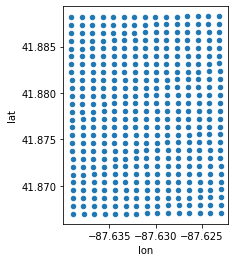

In [35]:
weatherDF.plot(kind='scatter', x='lon', y='lat').set_aspect('equal')
plt.show()

In [36]:
map = folium.Map(locations[len(locations)//2 - 1], zoom_start=14)

minLat = weatherDF.lat.min()
maxLat = weatherDF.lat.max()
minLon = weatherDF.lon.min()
maxLon = weatherDF.lon.max()

points = [[minLat, minLon], [minLat, maxLon], [maxLat, minLon], [maxLat, maxLon]]
folium.Rectangle(bounds=points, color='#ff7800', fill=True, fill_color='#ffff00', fill_opacity=0.2).add_to(map)
folium.Rectangle(bounds=points, color='#ff7800', fill=True, fill_color='#ffff00', fill_opacity=0.2).add_to(map)

for point in locations:
    folium.Marker(point, tooltip=f"({point[0]},{point[1]})").add_to(map)
    
map


In [37]:
buildingsDF = pd.read_csv('../buildings/chi0_90m_coord2bldg_smc.csv')

buildingsDF

,BLDGID,MEAN_AVGHT,Lat,Lon
0,1,1.74,41.867863,-87.628662
1,2,2.17,41.867859,-87.629822
2,4,2.97,41.867859,-87.629822
3,5,3.03,41.867863,-87.628662
4,10,3.73,41.867870,-87.626404
...,...,...,...,...
329,16526,77.78,41.886570,-87.624298
330,16941,20.63,41.886547,-87.625458
331,16953,44.16,41.886547,-87.625458
332,17163,68.68,41.887413,-87.624329


In [38]:
buildingMap = folium.Map(locations[len(locations)//2 - 1], zoom_start=14)

folium.Rectangle(bounds=points, color='#ff7800', fill=True, fill_color='#ffff00', fill_opacity=0.2).add_to(buildingMap)
folium.Rectangle(bounds=points, color='#ff7800', fill=True, fill_color='#ffff00', fill_opacity=0.2).add_to(buildingMap)

for id, row in buildingsDF.iterrows():
    folium.Marker([row['Lat'],row['Lon']],tooltip=row['BLDGID']).add_to(buildingMap)

buildingMap

In [39]:
elecDF = pd.read_json('../processed_data/NoMorphEdited.json')
elecDF.drop(['outputs'], inplace=True)
elecDF = elecDF.T.sort_index()
elecDF

,area_total,elec_per_area_total,elec_total
1,285.41,908.69,259.35
2,313.14,942.95,295.28
4,251.16,1207.21,303.2
5,288.21,1146.2,330.35
10,282.49,1255.94,354.79
...,...,...,...
16526,23135.9,369.43,8547.09
16941,21757,358.45,7798.86
16953,48278.8,304.17,14685
17163,11660.5,484.14,5645.33


In [40]:
lats = []
lons = []
for id, row in elecDF.iterrows():
    lats.append(buildingsDF[buildingsDF.BLDGID == id].Lat.values[0])
    lons.append(buildingsDF[buildingsDF.BLDGID == id].Lon.values[0])
elecDF['lat'] = lats
elecDF['lon'] = lons
elecDF

,area_total,elec_per_area_total,elec_total,lat,lon
1,285.41,908.69,259.35,41.867863,-87.628662
2,313.14,942.95,295.28,41.867859,-87.629822
4,251.16,1207.21,303.2,41.867859,-87.629822
5,288.21,1146.2,330.35,41.867863,-87.628662
10,282.49,1255.94,354.79,41.867870,-87.626404
...,...,...,...,...,...
16526,23135.9,369.43,8547.09,41.886570,-87.624298
16941,21757,358.45,7798.86,41.886547,-87.625458
16953,48278.8,304.17,14685,41.886547,-87.625458
17163,11660.5,484.14,5645.33,41.887413,-87.624329


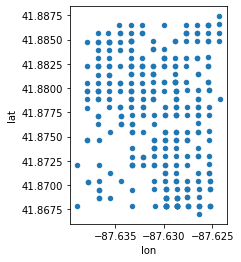

In [41]:
elecDF.plot(kind='scatter', x='lon', y='lat').set_aspect('equal')
plt.show()

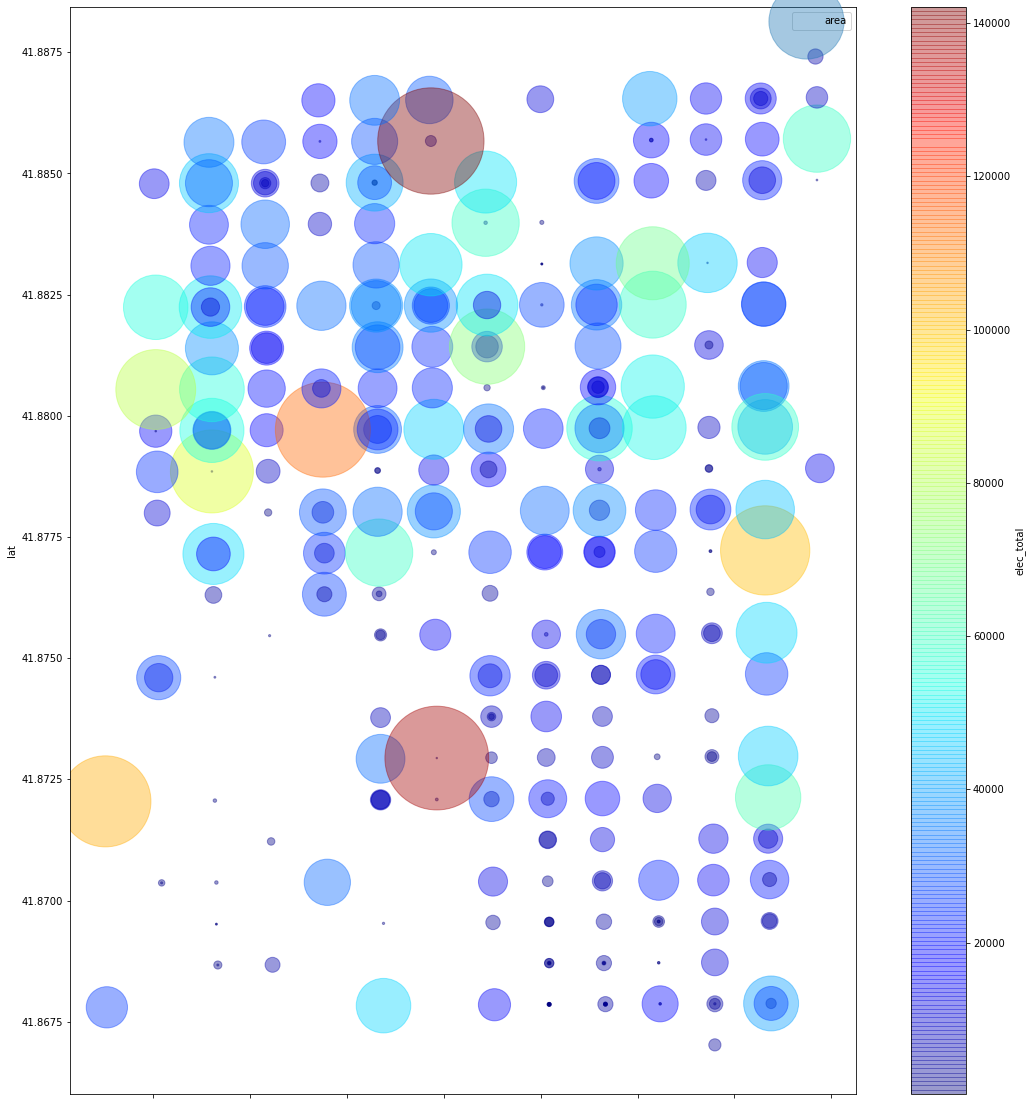

In [42]:
elecDF.plot(kind="scatter", x="lon", y="lat",
    s=np.array(elecDF['area_total']/50,dtype=np.float64), label="area",
    c="elec_total", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,20)
).set_aspect('equal')

plt.legend()
plt.show()

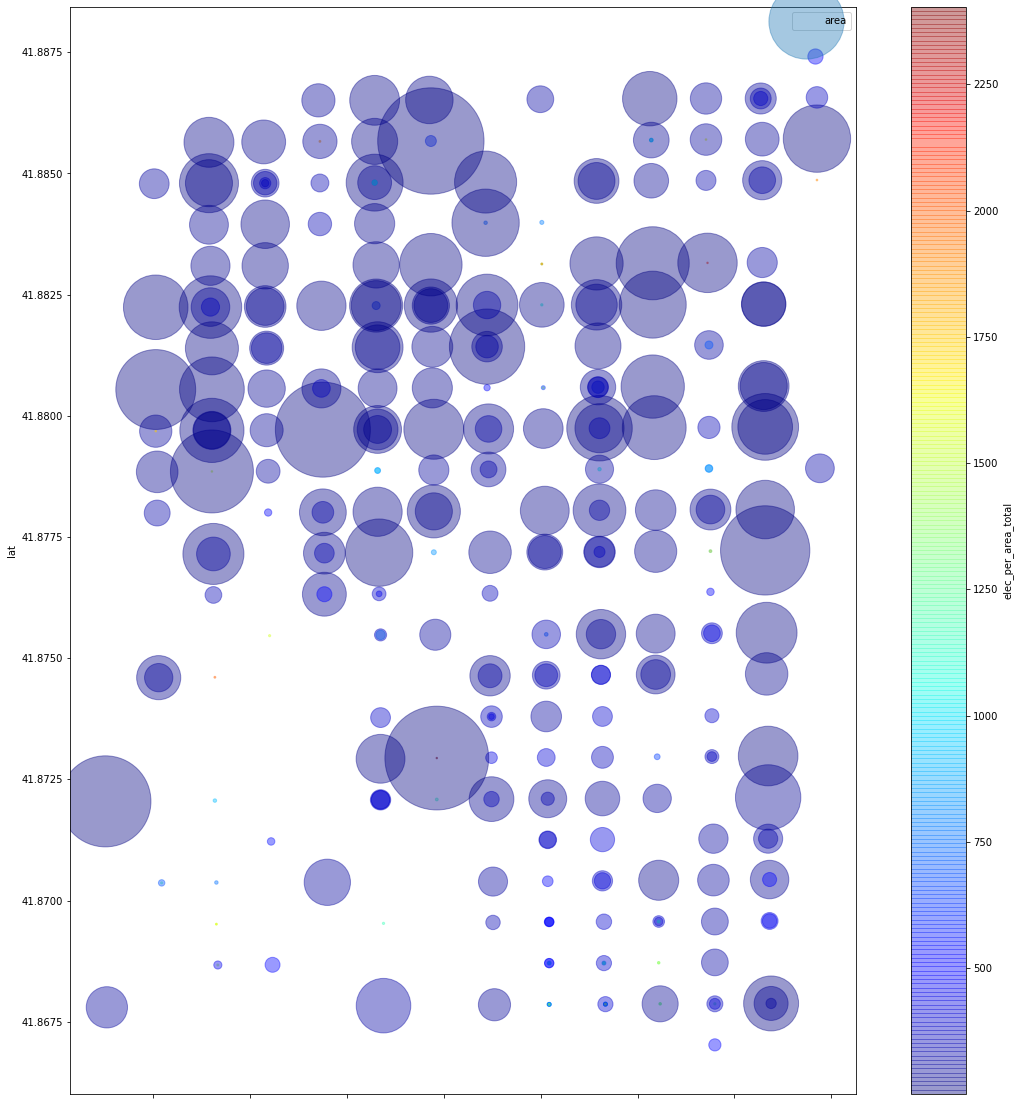

In [43]:
elecDF.plot(kind="scatter", x="lon", y="lat",
    s=np.array(elecDF['area_total']/50,dtype=np.float64), label="area",
    c="elec_per_area_total", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,20)
).set_aspect('equal')

plt.legend()
plt.show()

In [44]:
elecMap = folium.Map(locations[len(locations)//2 - 1], zoom_start=14)
for id, row in elecDF.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=row['area_total']/150000,
                        tooltip=id,
                        fill_color='#3db7e4'
                        ).add_to(elecMap)

buildingArr = elecDF[['lat', 'lon', 'elec_total']].values

elecMap.add_child(plugins.HeatMap(buildingArr, radius=15))
elecMap

In [45]:
elecPerAreaMap = folium.Map(locations[len(locations)//2 - 1], zoom_start=14)
for id, row in elecDF.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=row['area_total']/150000,
                        tooltip=id,
                        fill_color='#3db7e4'
                        ).add_to(elecPerAreaMap)

buildingArr = elecDF[['lat', 'lon', 'elec_per_area_total']].values

elecPerAreaMap.add_child(plugins.HeatMap(buildingArr, radius=15))
elecPerAreaMap